
# Murali Krishna Chintha  
## MSCS-634-M40 - Advanced Big Data and Data Mining
### Lab Assignment 2: Classification Using KNN and RNN Algorithms


In [2]:
# Step 1: Load and Prepare the Dataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare the dataset
wine = load_wine()
X = wine.data
y = wine.target

# Basic Data Exploration
print("Feature Names:", wine.feature_names)
print("Target Names:", wine.target_names)
print("Dataset shape:", X.shape)

Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Names: ['class_0' 'class_1' 'class_2']
Dataset shape: (178, 13)


In [4]:
print("\nFirst 5 records:")
X[:5]


First 5 records:


array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [5]:
print("\nClass Distribution:")
unique, counts = np.unique(y, return_counts=True)
for cls, cnt in zip(unique, counts):
    print(f"Class {cls} ({wine.target_names[cls]}): {cnt} samples")


Class Distribution:
Class 0 (class_0): 59 samples
Class 1 (class_1): 71 samples
Class 2 (class_2): 48 samples


In [7]:
# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 2: Implement KNN
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)

In [9]:
# Step 3: Implement RNN
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for radius in radius_values:
    rnn = RadiusNeighborsClassifier(radius=radius, outlier_label=-1)
    try:
        rnn.fit(X_train, y_train)
        y_pred = rnn.predict(X_test)
        acc = accuracy_score(y_test[y_pred != -1], y_pred[y_pred != -1])
    except:
        acc = 0
    rnn_accuracies.append(acc)

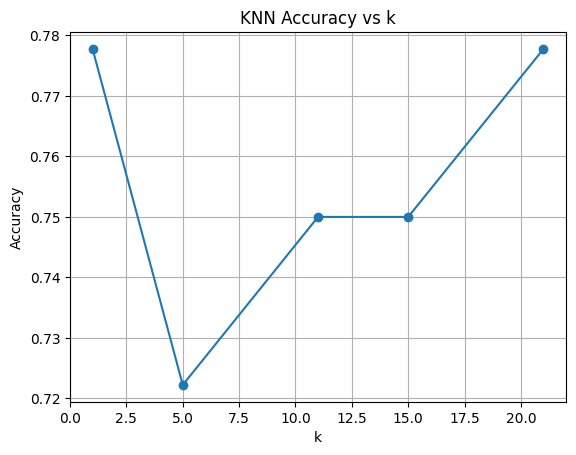

In [10]:
# Step 4: Visualize and Compare Results
# Plot KNN results
plt.figure()
plt.plot(k_values, knn_accuracies, marker='o')
plt.title("KNN Accuracy vs k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

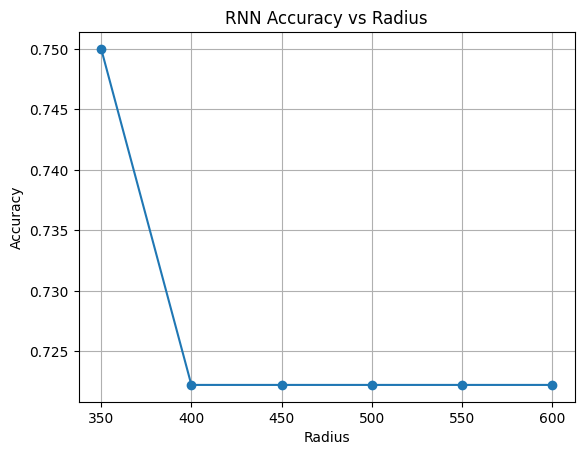

In [11]:
# Step 4: Visualize and Compare Results
# Plot RNN results
plt.figure()
plt.plot(radius_values, rnn_accuracies, marker='o')
plt.title("RNN Accuracy vs Radius")
plt.xlabel("Radius")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

## Analysis and Observations

### Model Comparison:
- **K-Nearest Neighbors (KNN)**:
  - Accuracy varies with different values of `k`.
  - Too small `k` (like 1) may lead to overfitting.
  - Larger `k` values smooth the decision boundary but may lead to underfitting.
  - A moderate `k` (like 5 or 11) often gives the best generalization performance.

- **Radius Neighbors (RNN)**:
  - Accuracy is sensitive to the choice of radius.
  - A very large radius may include too many neighbors and reduce model accuracy.
  - A very small radius may exclude too many neighbors and fail to make predictions (leading to unclassified samples).

### When to Use:
- Use **KNN** when:
  - You have a good idea of a suitable `k`.
  - You want consistent prediction (KNN always predicts one of the classes).
- Use **RNN** when:
  - Data has clusters of varying density.
  - You want the option to mark some data as outliers (if no neighbors fall within the radius).